## The dataset
The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).

In [1]:
##Necessary imports
## For data handling
from galaxyteam import dataset
import pandas as pd
import numpy as np

## For Image processing
from scipy import ndimage
import imageio as iio
 
## For plotting
import matplotlib.pyplot as plt
import seaborn as sns


## Miscellaneous tools
import os
from pathlib import Path
import glob

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

In [2]:
## Download the data locally
dataset.download_dataset()

In [3]:
# Get the path to the normal and pneumonia sub-directories

data_dir = Path("data/chest_xray/chest_xray")
trainpath = data_dir / 'train'
testpath = data_dir / 'test'
valpath = data_dir / 'val'


normal_cases_dir = trainpath / 'NORMAL'
pneumonia_cases_dir = trainpath / 'PNEUMONIA'

In [4]:
# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.jpeg')
pneumonia_cases = pneumonia_cases_dir.glob('*.jpeg')

# An empty list. We will insert the data into this list in (img_path, label) format
train_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    train_data.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1
for img in pneumonia_cases:
    train_data.append((img, 1))

# Get a pandas dataframe from the data we have in our list 
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)

# Shuffle the data 
train_data = train_data.sample(frac=1.).reset_index(drop=True)

# How the dataframe looks like?
train_data.head()

,image,label
0,data/chest_xray/chest_xray/train/PNEUMONIA/per...,1
1,data/chest_xray/chest_xray/train/PNEUMONIA/per...,1
2,data/chest_xray/chest_xray/train/PNEUMONIA/per...,1
3,data/chest_xray/chest_xray/train/NORMAL/IM-025...,0
4,data/chest_xray/chest_xray/train/PNEUMONIA/per...,1


## Some details about the data

In [5]:
print("Train set:")
print("-"*60)
print(f"PNEUMONIA={len(os.listdir(Path(trainpath / 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(Path(trainpath / 'NORMAL')))}")

print("\nTest set:")
print('-'*60)
print(f"PNEUMONIA={len(os.listdir(Path(testpath / 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(Path(testpath / 'NORMAL')))}")

print("\nValidation set")
print('-'*60)
print(f"PNEUMONIA={len(os.listdir(Path(valpath / 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(Path(valpath / 'NORMAL')))}")

Train set:
------------------------------------------------------------
PNEUMONIA=3876
NORMAL=1342

Test set:
------------------------------------------------------------
PNEUMONIA=390
NORMAL=234

Validation set
------------------------------------------------------------
PNEUMONIA=9
NORMAL=9


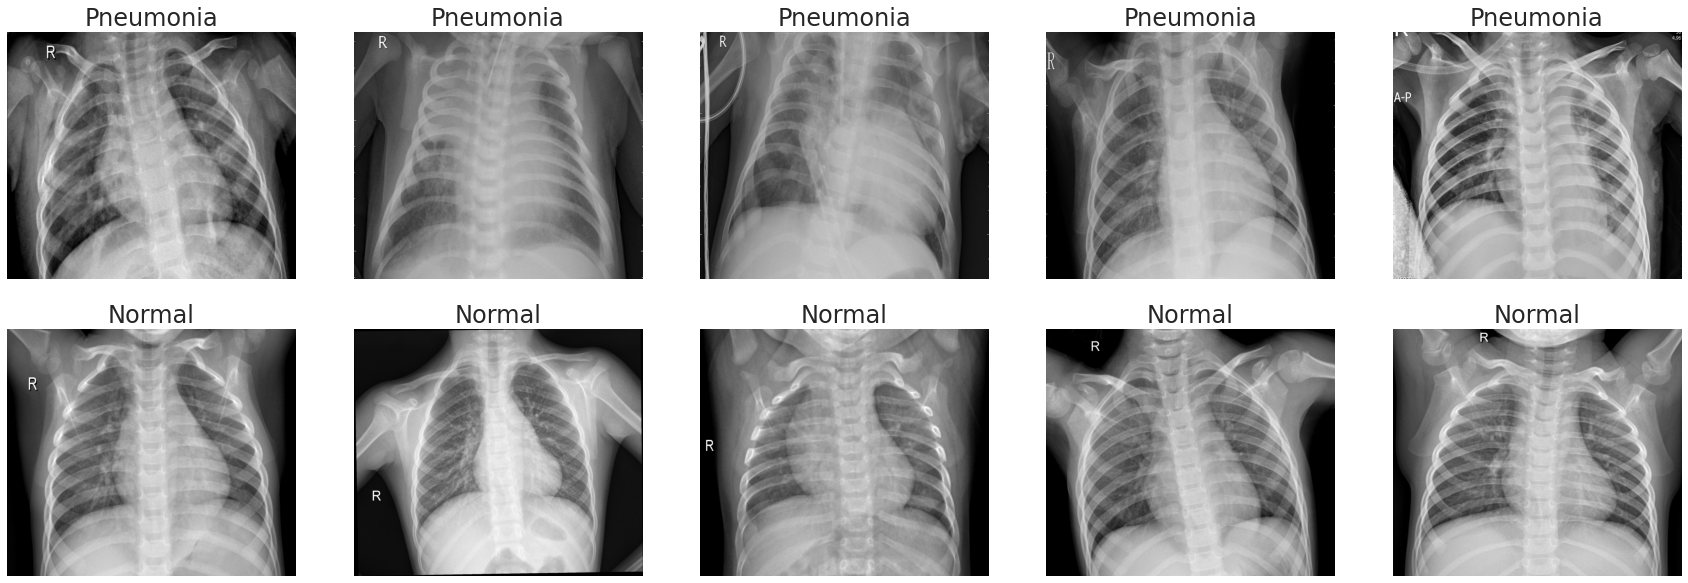

In [6]:
# Get few samples for both the classes
pneumonia_samples = (train_data[train_data['label']==1]['image'].iloc[:5]).tolist()
normal_samples = (train_data[train_data['label']==0]['image'].iloc[:5]).tolist()

# Concat the data in a single list and del the above two list
samples = pneumonia_samples + normal_samples
del pneumonia_samples, normal_samples

# Plot the data 
f, ax = plt.subplots(2,5, figsize=(30,10))
for i in range(10):
    img = plt.imread(samples[i])
    ax[i//5, i%5].imshow(img, cmap='gray')
    if i<5:
        ax[i//5, i%5].set_title("Pneumonia")
    else:
        ax[i//5, i%5].set_title("Normal")
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
plt.show()

Just by eye we can see that images with Pneumonia have higher opacity compared to the normal. Therefore we expect the normal cases to have a higher variance as we can see below.

In [7]:
normal_var = []
for i in range(1200):
    img = plt.imread(train_data[train_data['label']==0]['image'].iloc[i])
    normal_var.append(ndimage.variance(img))

In [8]:
pneumonia_var = []
for i in range(1200):
    img = plt.imread(train_data[train_data['label']==1]['image'].iloc[i])
    pneumonia_var.append(ndimage.variance(img))

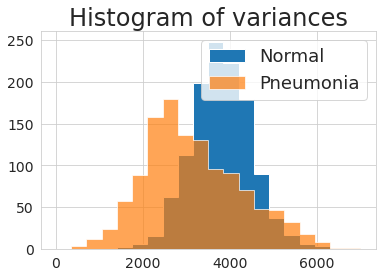

In [9]:
plt.title("Histogram of variances")
plt.hist(normal_var,label="Normal",bins=20,range=(0,7000),histtype='stepfilled')
plt.hist(pneumonia_var,alpha=0.7,label="Pneumonia",bins=20,range=(0,7000),histtype='stepfilled')
plt.legend()